## Module5-HW

- Use the `train.csv` data to train and `test.csv` data to report your testing results.
- Your target variable is `SalePrice`
- Report summary information about your data:
- - Report min, max, mean of your numerical features (use `describe` method)
- - Create scatter (with respect to target variable) and box plots of your variables
- - Check the correlations between your variables and the target variable

- Split your data into train and test (Keep in mind that this test data will only be used for training purposes. you are going to report your test result on the `test.csv` file, not on this test data that you obtained from the training data)
- Train your transformers on the train data set. You may choose to use pipeline and column transformer at this step. 
- - scaler
- - polynomial transformer
- - OneHot Encoder
- - Simple Imputer
- Train Linear regression. Ridge Regression, and Lasso Regression models
- Optimize the `alpha` parameter for Ridge and Lasso Regressors
- Visualize the coefficients of the three models as we did in class
- Check which variables are eliminated with Lasso regression. Check the correlation values for these eliminated variables (you got the correlation values from an earlier step)

In [143]:
import pandas as pd
training_df = pd.read_csv("train.csv")
print(training_df.shape)
print(training_df.columns)
training_df.head(5)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
testing_df = pd.read_csv("test.csv")
print(testing_df.shape)
print(testing_df.columns)
testing_df.head(5)

(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [145]:
X = training_df.drop(['SalePrice'], axis=1)
y = training_df['SalePrice']

In [146]:
print(X.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [147]:
import matplotlib.pyplot as plt
import numpy as np

In [148]:
all_features = X.select_dtypes(include=[np.number]).columns

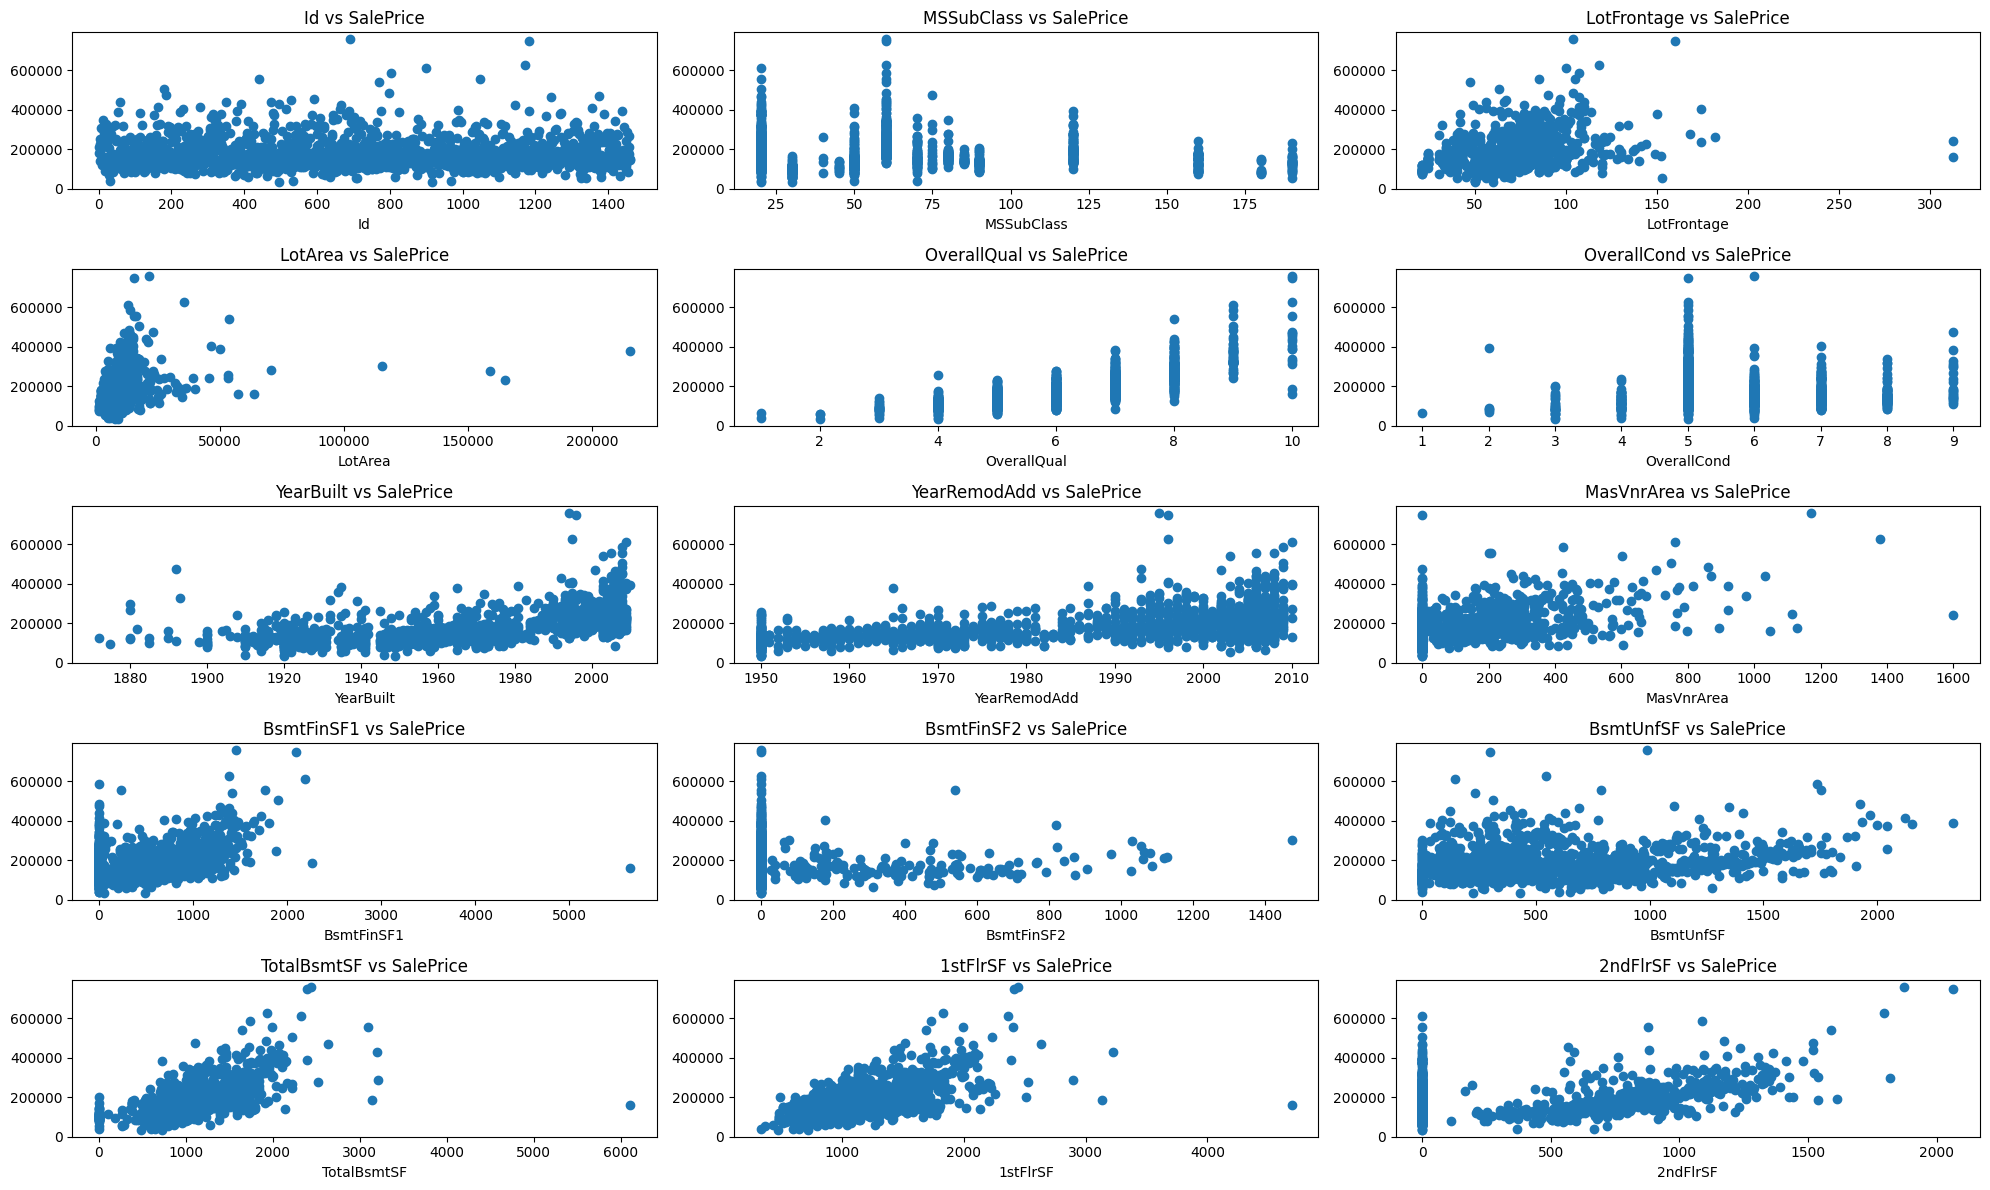

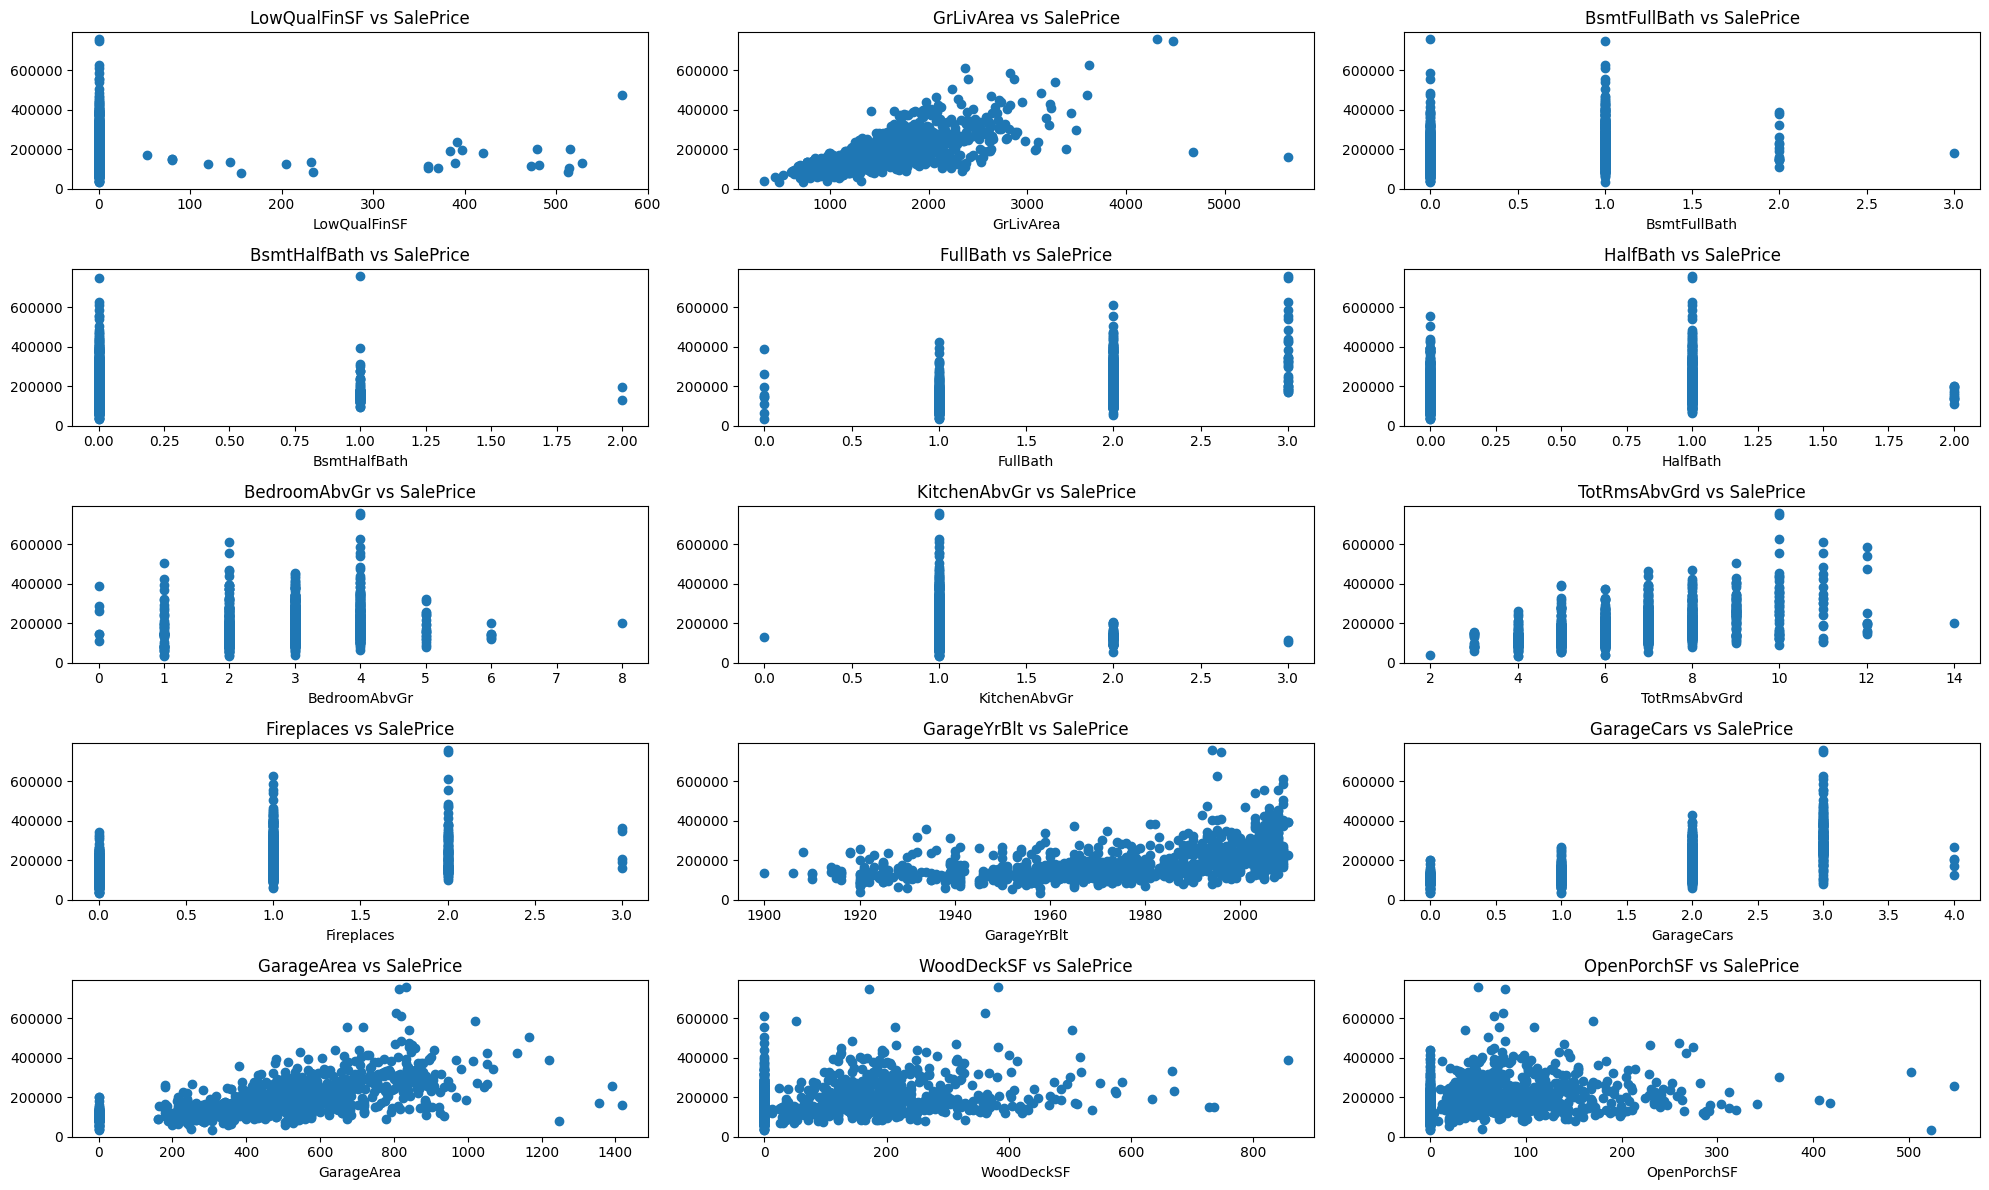

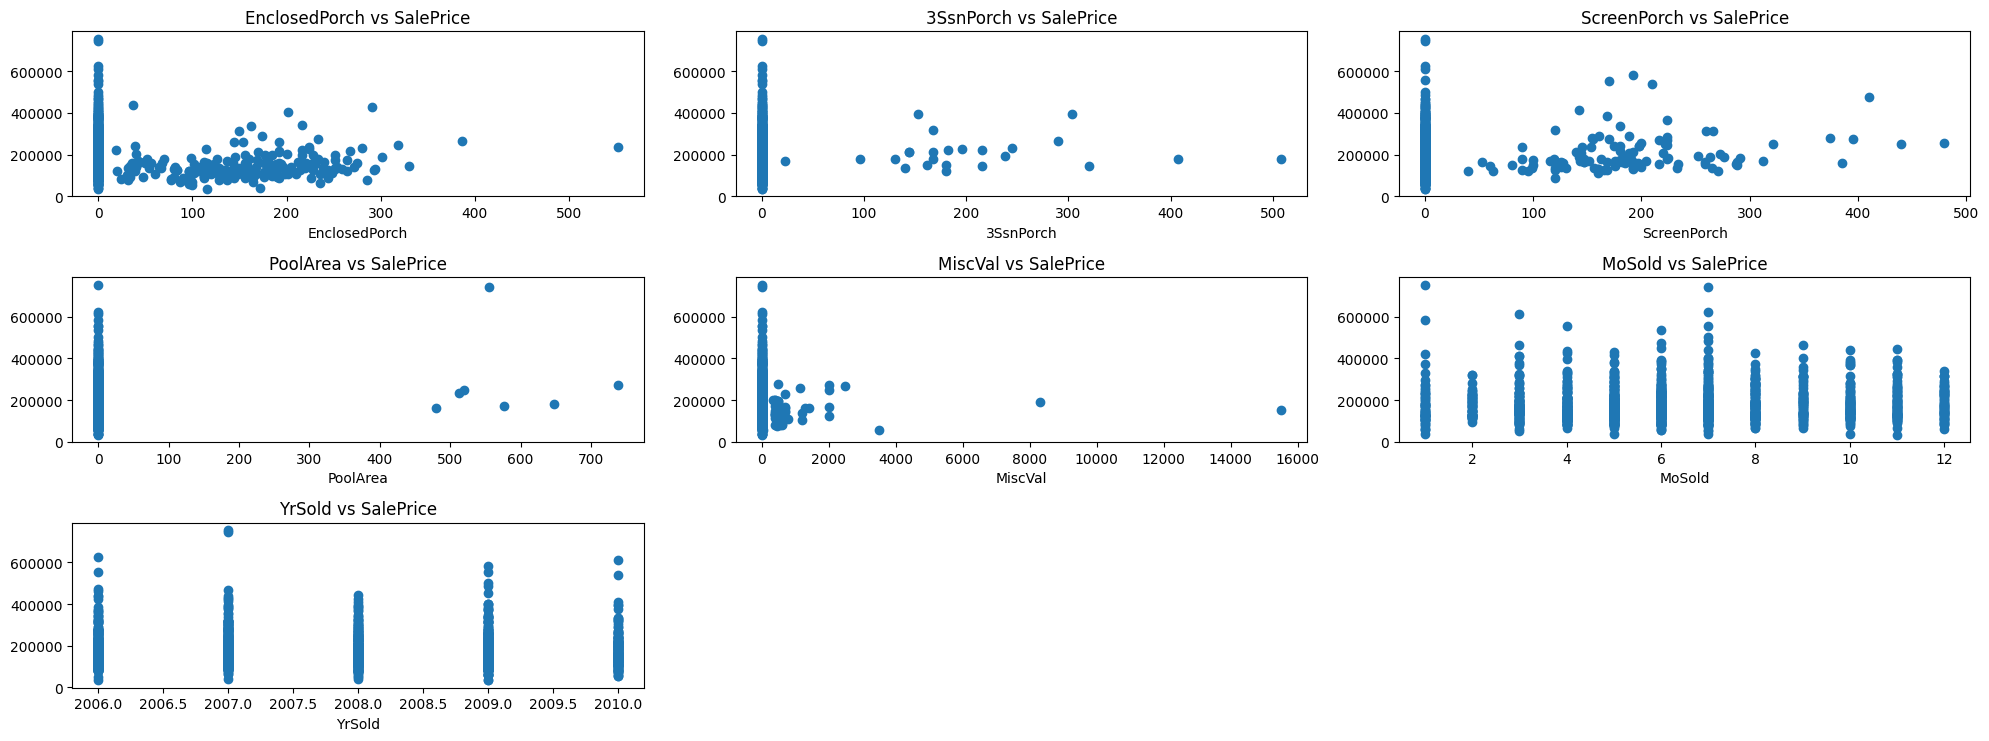

In [149]:
# 15 scatter plots at a time
for i in range(0, len(all_features), 15):
    plt.figure(figsize=(20, 12))
    for j in range(15):
        if i + j < len(all_features):
            # 5 columns in each row
            # 3 rows in each figure
            plt.subplot(5, 3, j + 1)
            feature = all_features[i + j]
            plt.scatter(X[feature], y)
            plt.xlabel(f"{feature}")
            # no y label needed since it is always SalePrice
            plt.title(f'{feature} vs SalePrice')
    plt.tight_layout()
    plt.show()

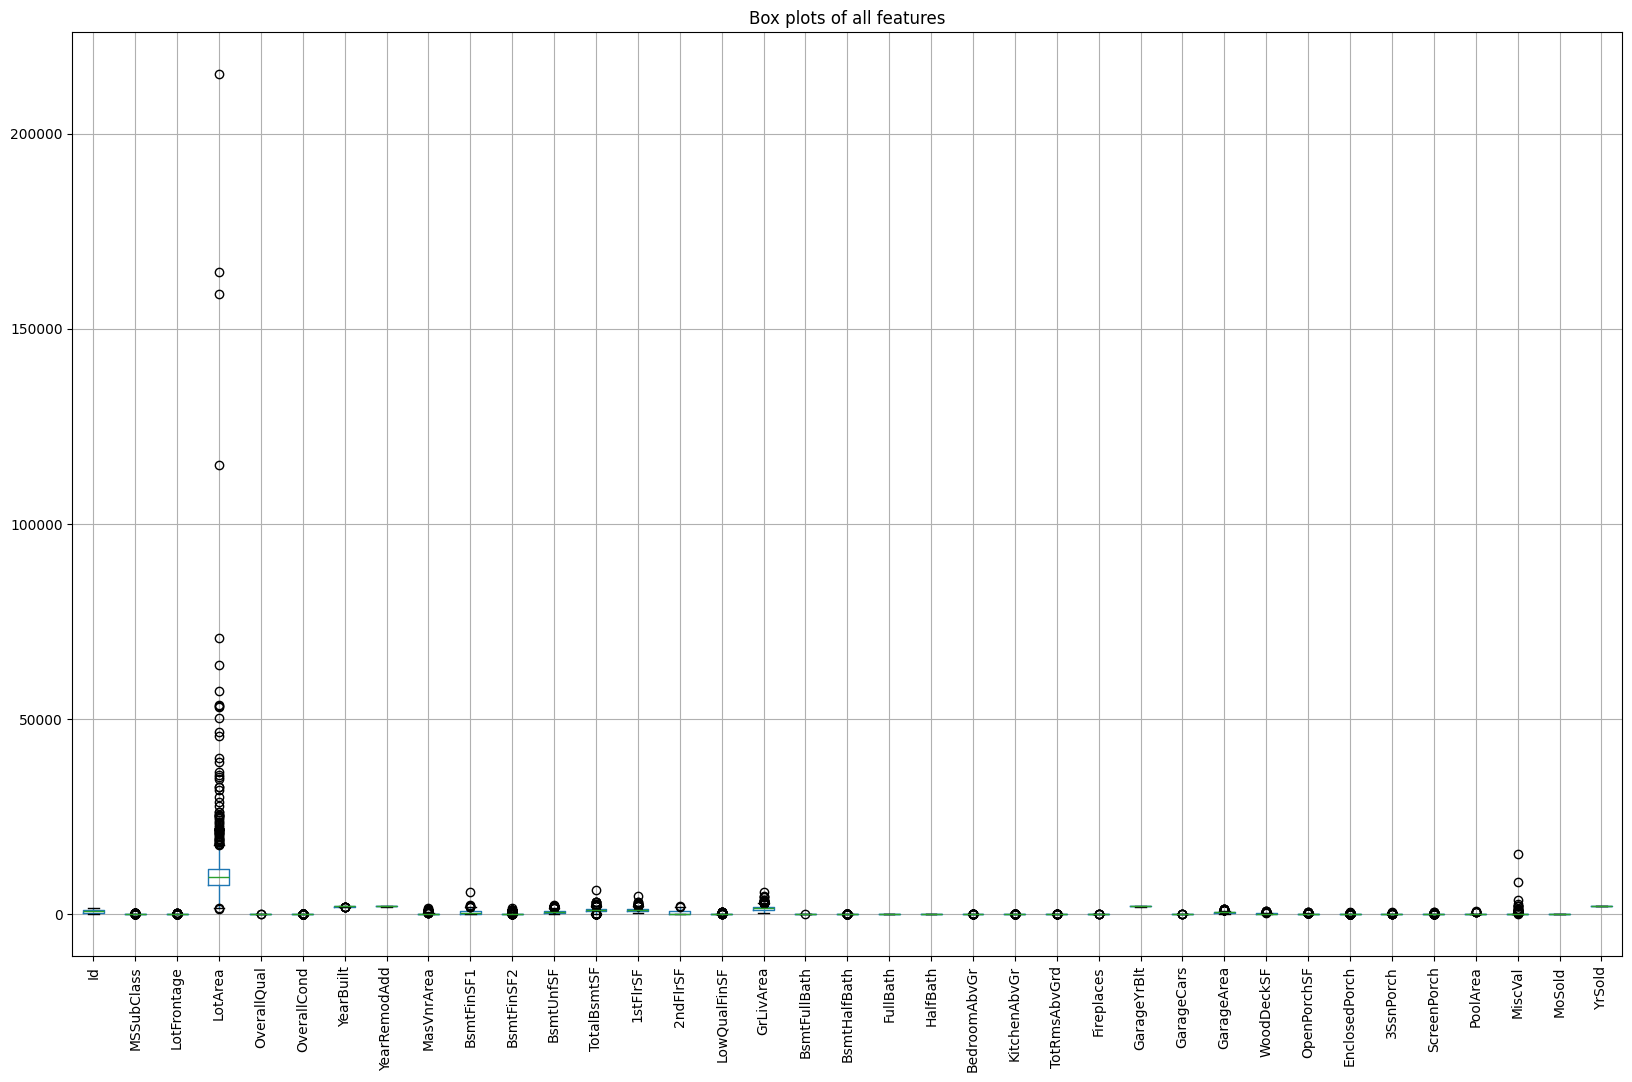

In [150]:
plt.figure(figsize=(20, 12))
X.boxplot()
plt.xticks(rotation=90)
plt.title("Box plots of all features")
plt.show()

In [151]:
"""# alternative method because a few columns are very skewed
training_df_plot = X.drop(["LotArea", "MiscVal"], axis=1)
training_df_plot.plot(kind='box', figsize=(20, 12))
plt.title('Box Plots of Almost All Features')
plt.xticks(rotation=90)
plt.show()"""

'# alternative method because a few columns are very skewed\ntraining_df_plot = X.drop(["LotArea", "MiscVal"], axis=1)\ntraining_df_plot.plot(kind=\'box\', figsize=(20, 12))\nplt.title(\'Box Plots of Almost All Features\')\nplt.xticks(rotation=90)\nplt.show()'

In [152]:
"""# have to print 
plt.figure(figsize=(3, 4))
X["LotArea"].plot(kind='box')
plt.title('Box Plot of LotArea')
plt.show()"""

'# have to print \nplt.figure(figsize=(3, 4))\nX["LotArea"].plot(kind=\'box\')\nplt.title(\'Box Plot of LotArea\')\nplt.show()'

In [153]:
"""plt.figure(figsize=(3, 4))
X["MiscVal"].plot(kind='box')
plt.title('Box Plot of MiscVal')
plt.show()"""

'plt.figure(figsize=(3, 4))\nX["MiscVal"].plot(kind=\'box\')\nplt.title(\'Box Plot of MiscVal\')\nplt.show()'

In [154]:
# for some reason X is holding str so we are only including numbers
X_numbers_only = X.select_dtypes(include=[np.number])
correlations = X_numbers_only.corrwith(y)
print(correlations.sort_values(ascending=False))

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


# Repeating Instructions here
- Split your data into train and test (Keep in mind that this test data will only be used for training purposes. you are going to report your test result on the `test.csv` file, not on this test data that you obtained from the training data)
- Train your transformers on the train data set. You may choose to use pipeline and column transformer at this step. 
- - scaler
- - polynomial transformer
- - OneHot Encoder
- - Simple Imputer
- Train Linear regression. Ridge Regression, and Lasso Regression models
- Optimize the `alpha` parameter for Ridge and Lasso Regressors
- Visualize the coefficients of the three models as we did in class
- Check which variables are eliminated with Lasso regression. Check the correlation values for these eliminated variables (you got the correlation values from an earlier step)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer

In [164]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)
    ])

In [165]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [168]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

param_grid = {'regressor__alpha': np.logspace(-4, 1, 30)}
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', Ridge())])

In [178]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 455, in

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrA...
       4.89390092e-04, 7.27895384e-04, 1.08263673e-03, 1.61026203e-03,
       2.39502662e-03, 3.56224789e-03, 5.29831691e-03, 7.88046282e-03,
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.72335754e+00, 1.00000000e+01])})

# Repeating Instructions here
- Train Linear regression. Ridge Regression, and Lasso Regression models
- Optimize the `alpha` parameter for Ridge and Lasso Regressors
- Visualize the coefficients of the three models as we did in class
- Check which variables are eliminated with Lasso regression. Check the correlation values for these eliminated variables (you got the correlation values from an earlier step)

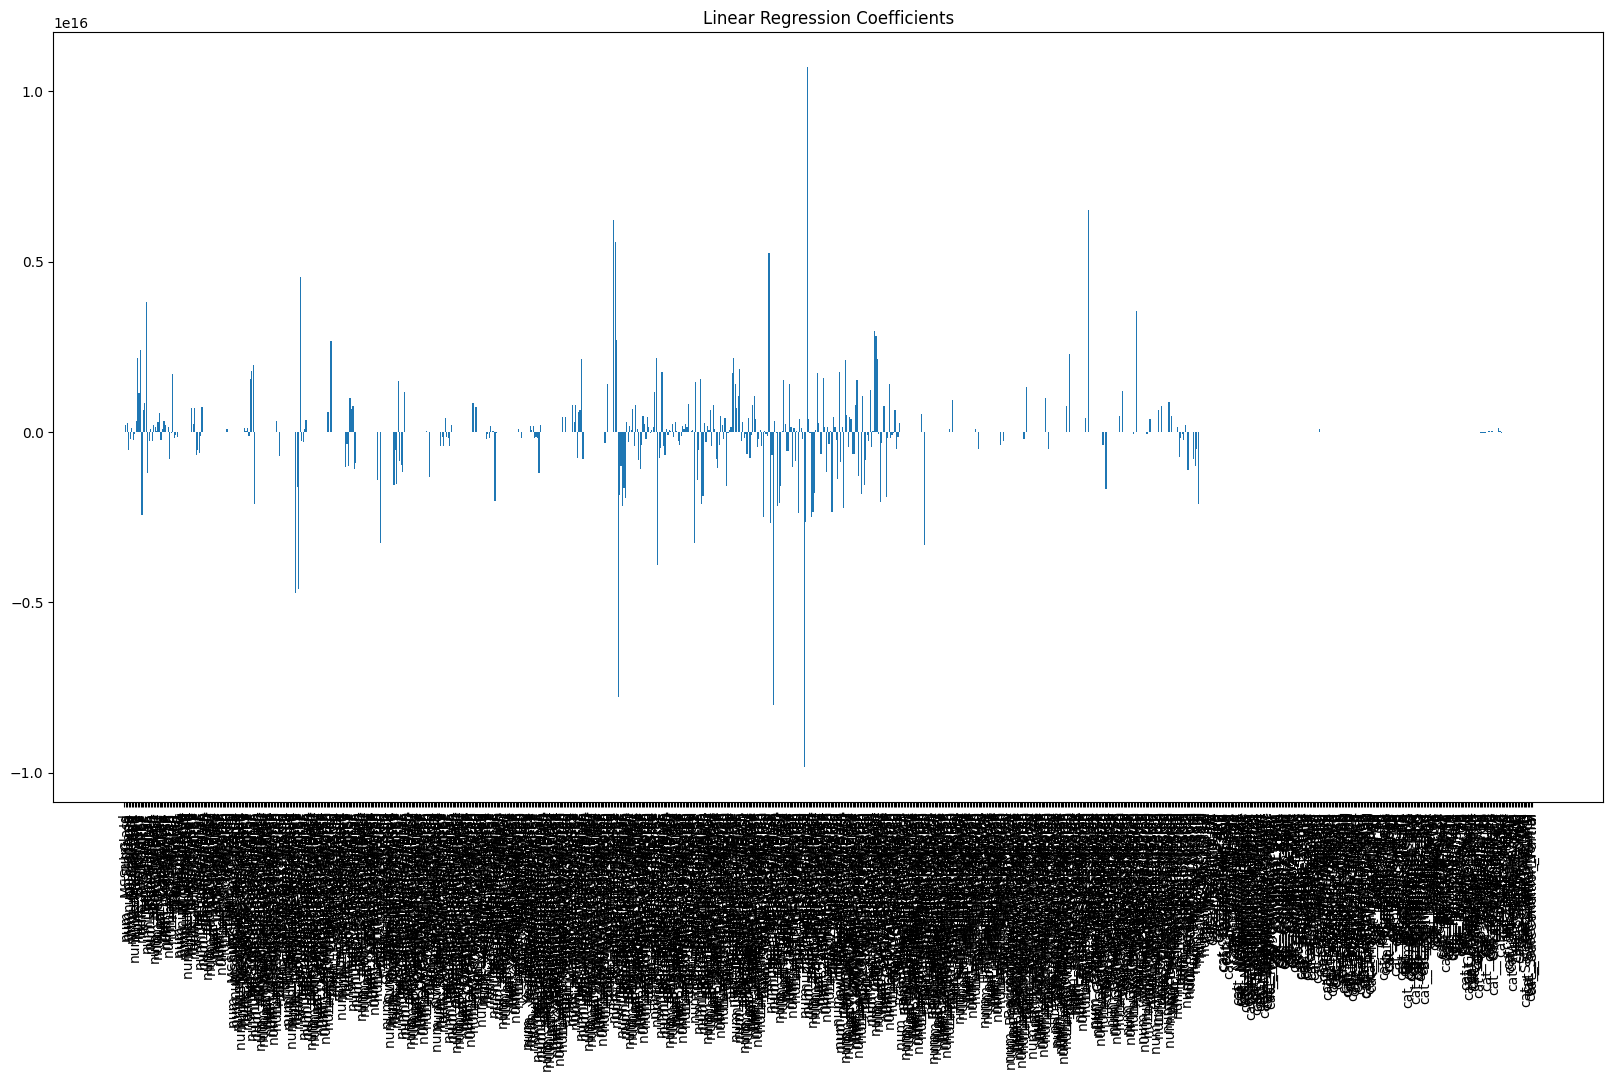

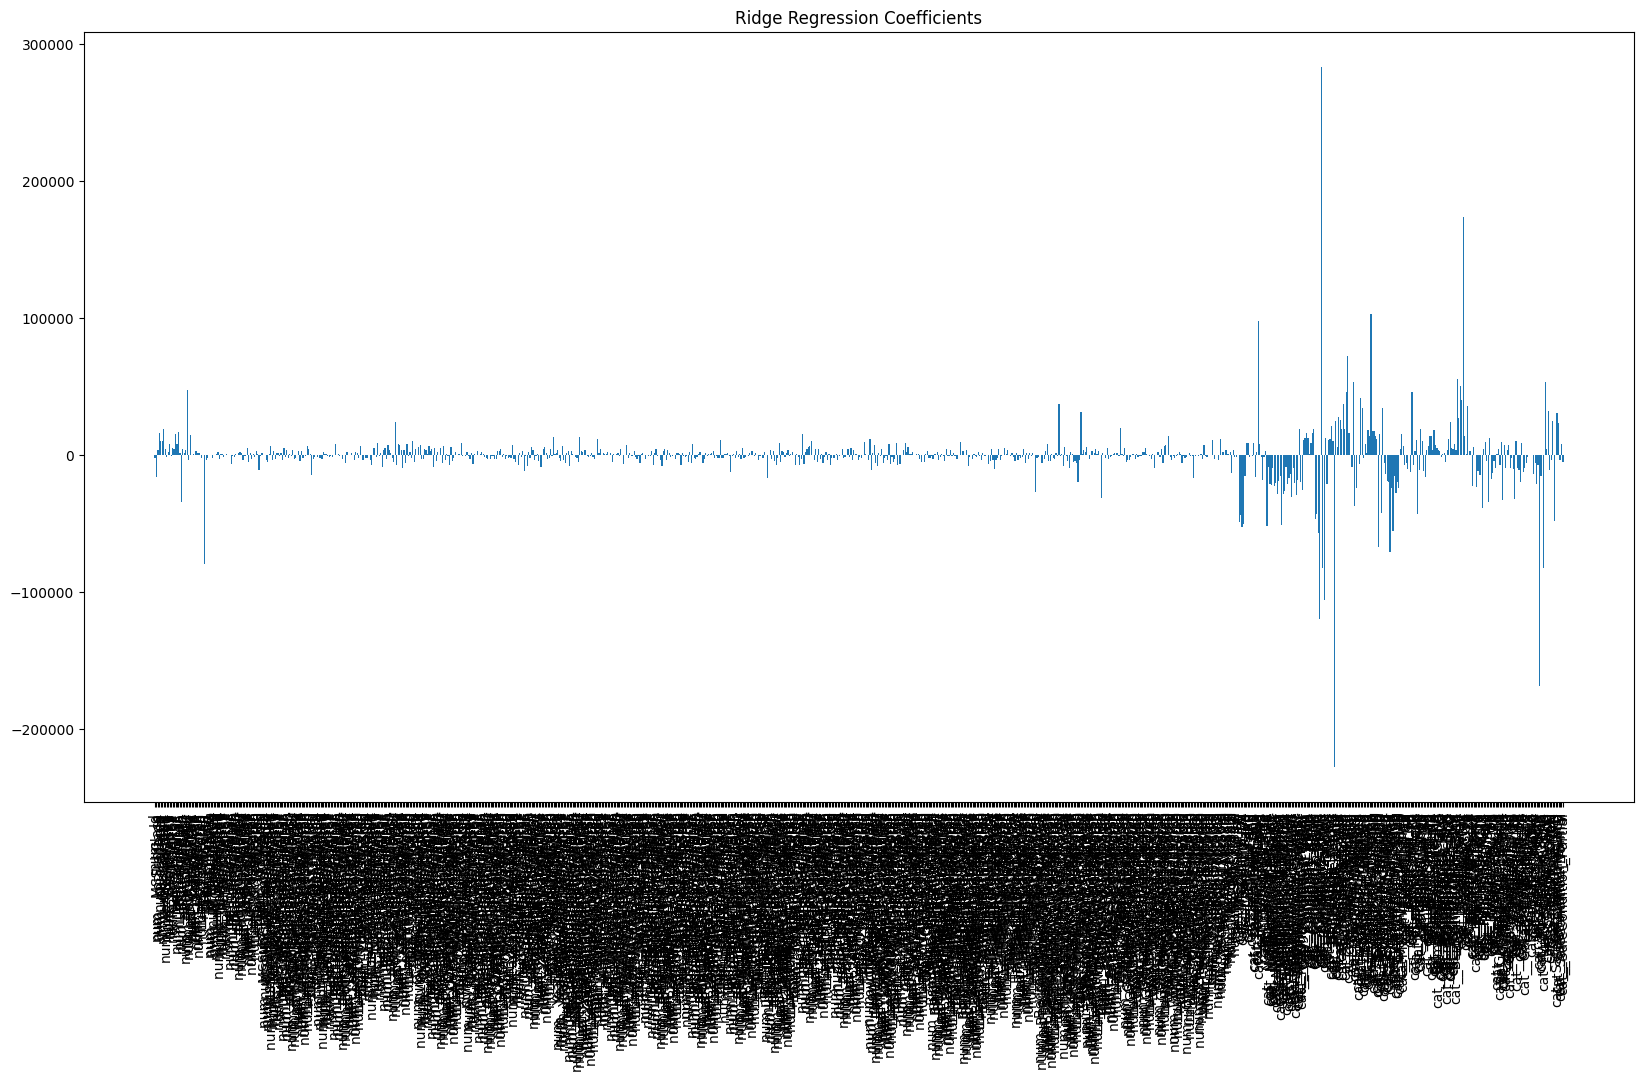

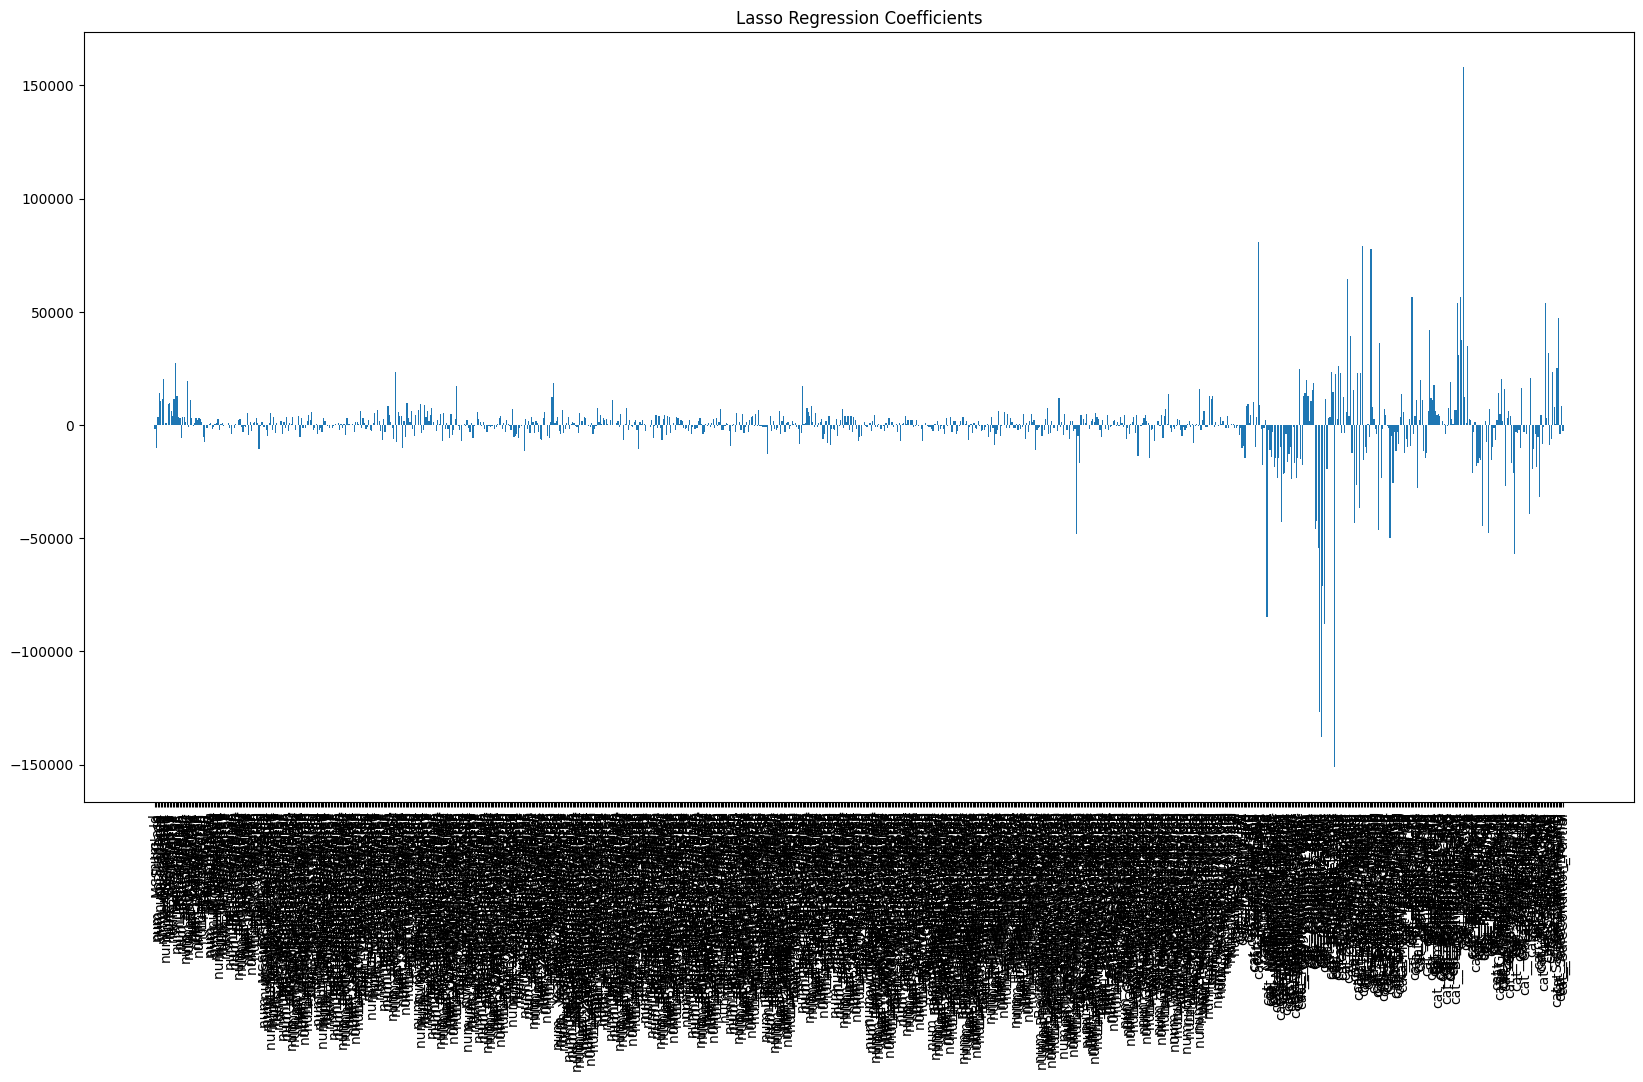

In [181]:
models = [lr_pipeline, ridge_grid.best_estimator_, lasso_grid.best_estimator_]
titles = ["Linear Regression Coefficients", "Ridge Regression Coefficients", "Lasso Regression Coefficients"]

for model, title in zip(models, titles):
    coef = model.named_steps['regressor'].coef_
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    plt.figure(figsize=(20, 10))
    plt.bar(range(len(coef)), coef)
    plt.title(title)
    plt.xticks(range(len(coef)), feature_names, rotation=90)
    plt.show()

In [182]:
lasso_coef = lasso_grid.best_estimator_.named_steps['regressor'].coef_
feature_names = lasso_grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
eliminated_features = feature_names[lasso_coef == 0]
print("lasso eliminated features:", eliminated_features)

lasso eliminated features: []


In [183]:
eliminated_correlations = correlations[correlations.index.isin(eliminated_features)]
print("Correlation values for eliminated features:")
print(eliminated_correlations)

Correlation values for eliminated features:
Series([], dtype: float64)
